In [36]:
#inporting dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [43]:
#using pandas to read the database in the same folder
data=pd.read_csv('mnist_train.csv')

In [3]:
#viewing the column heads
data.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [11]:
#extracting the data from the dataset 
extract_data=data.iloc[2,1:].values

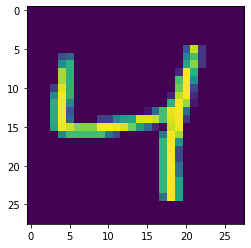

In [12]:
#reshaping the extracted data into a reasonable size
extract_data=extract_data.reshape(28,28).astype('uint8')
plt.imshow(extract_data)

In [13]:
#preparing the data
#seperating the labels and data values
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [14]:
#creating the test and train sizes/batches
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [19]:
#check the data
x_train.head()

1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
20379    0    0    0    0    0    0    0    0    0     0  ...      0      0   
53032    0    0    0    0    0    0    0    0    0     0  ...      0      0   
27005    0    0    0    0    0    0    0    0    0     0  ...      0      0   
30510    0    0    0    0    0    0    0    0    0     0  ...      0      0   
508      0    0    0    0    0    0    0    0    0     0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
20379      0      0      0      0      0      0      0      0  
53032      0      0      0      0      0      0      0      0  
27005      0      0      0      0      0      0      0      0  
30510      0      0      0      0      0      0      0      0  
508        0      0      0      0      0      0      0      0  

[5 rows x 784 columns]

In [20]:
#call rf classifier
rf=RandomForestClassifier(n_estimators=100)

In [21]:
#fit the model
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
#prediction on the test data
pred=rf.predict(x_test)


In [24]:
pred

array([2, 7, 6, ..., 6, 4, 2], dtype=int64)

In [39]:
#check prediction accuracy
c=y_test.values

#calculate number of correctly predicted values
count=0
for i in range(len(pred)):
    if pred[i]==c[i]:
        count=count+1


In [40]:
count

11617

In [41]:
#total values that the prediction code was on run
len(pred)

12000

In [1]:
#accuracy value
11617/12000


0.9680833333333333